<a href="https://colab.research.google.com/github/DARETNY/Linear_Reg_Overview/blob/main/LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regresiyon Model From Scratch (basic)
<img src=https://towardsdatascience.com/wp-content/uploads/2020/11/1N1-K-A43_98pYZ27fnupDA-scaled.jpeg>

Linear regression is a statistical method used to model the relationship between a dependent variable $(y)$ and one or more independent variables $(x)$. The goal of linear regression is to predict the value of the dependent variable based on the values of the independent variables. The relationship is expressed as a linear equation.

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon $$

- $( y)$: Dependent variable (target variable)
- $(\beta_0 )$: Intercept (the point where the model intersects the y-axis)
- $( \beta_1, \beta_2, \dots, \beta_n)$: Regression coefficients (determine the slope of the model)
- $( x_1, x_2, \dots, x_n )$: Independent variables (features)
- $( \epsilon)$: Error term (the difference between the actual value and the predicted value)

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("bmh")
import warnings
warnings.filterwarnings("ignore")

In [173]:
class LinearRegresion:
    def __init__(self, lr=0.001, n_iters=100):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
          y_pred=np.dot(X, self.weights) + self.bias # y=w.x+b  w =weight x=values b=bias

          dw = (1/n_samples) * np.dot(X.T, (y_pred - y)) # Transpose X to align dimensions for matrix multiplication
          db = (1/n_samples) * np.sum(y_pred - y)

          self.weights -= self.lr * dw
          self.bias -=   self.lr * db

    def predict(self, X):
         if self.weights is None or self.bias is None:
          raise ValueError("Model is not trained yet. Call fit() before predict().")
         y_pred = np.dot(X, self.weights) + self.bias
         return y_pred

    def show_accury(self, y_test, y_pred):
        """
        Calculates and prints the R-squared score as a measure of accuracy for regression.

        Args:
            y_test: The actual target values.
            y_pred: The predicted target values.

        Returns:
            The R-squared score.
        """
        # Calculate the total sum of squares (TSS)
        tss = np.sum((y_test - np.mean(y_test)) ** 2)

        # Calculate the residual sum of squares (RSS)
        rss = np.sum((y_test - y_pred) ** 2)

        # Calculate R-squared
        r2 = 1 - (rss / tss)

        return print(f"R2 score : {r2:.4f}")  # Return the calculated R-squared value

In [174]:
# @title Noise test {"run":"auto","vertical-output":true}
noise_ = 7 # @param {"type":"slider","min":0,"max":20,"step":1}


\begin{align*}
dw &= \frac{1}{n_{samples}} \cdot X^T \cdot (y_{pred} - y) \\
db &= \frac{1}{n_{samples}} \cdot \sum(y_{pred} - y) \\
w &:= w - \alpha \cdot dw \\
b &:= b - \alpha \cdot db
\end{align*}

[[ 1.0035329 ]
 [ 0.00511346]
 [-1.19620662]
 [-1.01283112]
 [ 1.57921282]]


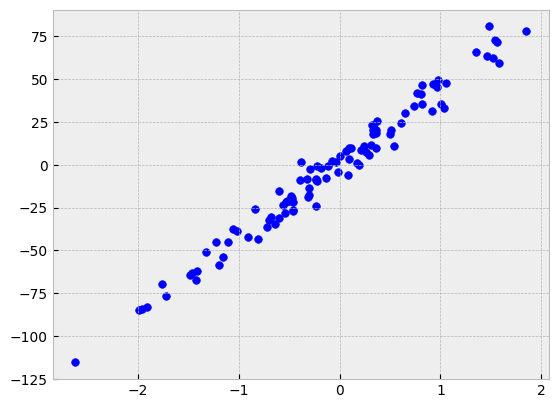

In [175]:
# Lets test our model
from sklearn.model_selection import train_test_split
from sklearn import datasets

x,y = datasets.make_regression(n_samples=100, n_features=1, noise=noise_, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

print(x_train[:5])
plt.scatter(x, y, color='b', marker='o', s=30)

In [176]:
lr=LinearRegresion(n_iters=1000)
lr.fit(x_train, y_train)
pred=lr.predict(x_test)
print(pred[:5])
lr.show_accury(y_test, pred)

[ 8.74594909  4.54153104  2.34550356 -6.2583091  -2.32905529]
R2 score : 0.7973


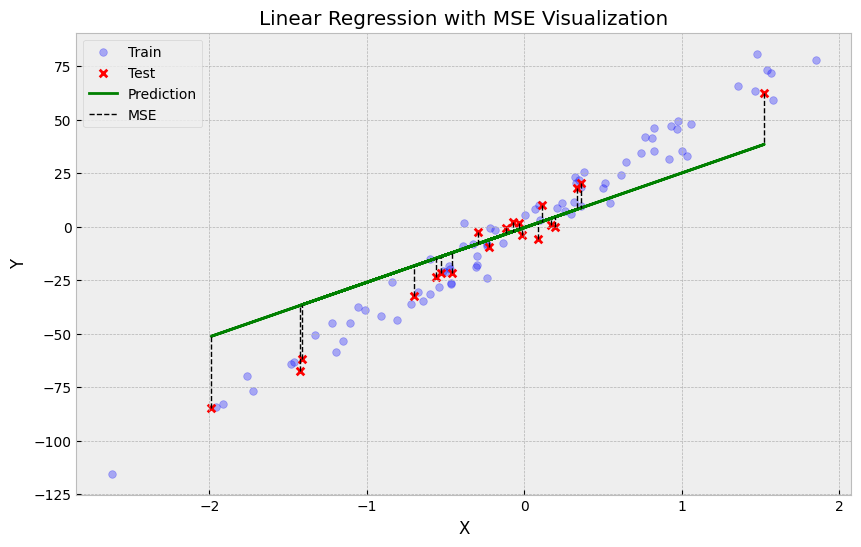

In [177]:
# Assuming x_test, y_test, and pred are defined from the previous code
plt.figure(figsize=(10, 6))

# Original scatter plot
plt.scatter(x_train, y_train, color='b', marker='o', s=30, label='train', alpha=0.3)
plt.scatter(x_test, y_test, color='r', marker='x', s=30, label='test')
plt.plot(x_test, pred, color='g', label='prediction')

# MSE visualization
for i in range(len(x_test)):
    # MSE çizgisi
   plt.plot([x_test[i], x_test[i]], [y_test[i], pred[i]], color='black', linestyle='--', linewidth=1)


# Labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Train','Test','Prediction','MSE'])
plt.title("Linear Regression with MSE Visualization")
plt.grid(True)
plt.autoscale()
plt.show()


##  **Summary of Our Linear Regression Model**  

In this tutorial, we built a **linear regression model from scratch** using Python, without leveraging any built-in machine learning libraries. The objective was to learn the inner workings of linear regression, from parameter initialization to optimization using **gradient descent**.  

---

###  **Steps We Followed:**  
1. **Mathematical Foundation of Linear Regression:**  
   We modeled a linear relationship between input features and the target variable:  
   $$ y = \beta_0 + \beta_1 x_1 + \epsilon $$  

   Where:  
   - $( y )$ is the target variable  
   - $( \beta_0)$ is the intercept  
   - $( \beta_1)$ is the coefficient  
   - $( \epsilon )$ is the error term  

---

2. **Optimization Using Gradient Descent:**  
   To minimize the error between predictions and actual values, we used **gradient descent**. The update rules for the weights and bias were derived from the partial derivatives of the cost function:  

   #### 📌 **Cost Function (Mean Squared Error):**  
   $$ J(\theta) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$  

   #### 📍 **Gradient Descent Formulas:**  
   To update the parameters iteratively:  
   $$[
   dw = \frac{1}{n_{samples}} \cdot X^T \cdot (y_{pred} - y) \\
   db = \frac{1}{n_{samples}} \cdot \sum(y_{pred} - y) \\
   w := w - \alpha \cdot dw \\
   b := b - \alpha \cdot db
   ]$$

   - $( \alpha)$: Learning rate  
   - $( dw )$: Gradient of the cost function w.r.t weights  
   - $( db )$: Gradient of the cost function w.r.t bias  

---

3. **Model Evaluation - R-Squared Score:**  
   We evaluated the performance of the model using the **R-squared ( \( R^2 \) )** metric. This metric measures how well the regression line fits the data:  

   $$[
   R^2 = 1 - \frac{\sum (y_i - \hat{y_i})^2}{\sum (y_i - \bar{y})^2}
   ]$$

   in other words:
   $$R^2=1-rss/tss $$
   - rss=Residual Sum of Squares , tss=Total Sum of Squares
   - $( y_i )$: Actual value  
   - $( \hat{y_i} )$: Predicted value  
   - $( \bar{y} )$: Mean of actual values  
   - $( R^2 = 1 )$: Perfect prediction, $( R^2 = 0 )$: Model as good as random guessing.  

---

4. **Visualization:**  
We used Matplotlib to visualize the model's performance. We plotted:  
- Training data (blue)  
- Test data (red)  
- Prediction line (green)  

---

###  **Conclusion:**  
By implementing linear regression from scratch, we gained a deeper understanding of its mechanics, including parameter optimization through gradient descent. While our model achieved reasonable performance, further enhancements could include adding **regularization techniques** (e.g., Ridge or Lasso regression) or exploring **advanced optimization algorithms**.  

This exercise provides a foundational understanding of regression, crucial for more advanced machine learning models! 🚀


---

# **Linear Regression Advanced Model**

Now, we will dive into the advanced version of linear regression, which is called **SGD (Stochastic Gradient Descent)**. Additionally, we will incorporate **regularization** techniques. Let's first understand what SGD and regularization are:

---

## 🚀 **SGD (Stochastic Gradient Descent)**

> **SGD** is an optimization method frequently used in machine learning and deep learning algorithms. The aim is to optimize the parameters of the model by minimizing a loss function.

### ✅ **SGD Basic Logic**
1. **Gradient Descent (GD)** computes the derivative of the loss function and takes steps in the direction of steepest descent. This approach updates the model parameters using the entire dataset at each iteration.
2. **Stochastic Gradient Descent (SGD)**, on the other hand, updates the model parameters using a randomly selected sample or a small **mini-batch** instead of the entire dataset. As a result, the update at each step is faster but can be noisier. This noise can help SGD avoid local minima and achieve a better global minimum.

---

### **How SGD Works?**

Given a linear regression model:

$
h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
$

The **Mean Squared Error (MSE)** loss function is defined as:

$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$

In **SGD**, the update rule for each parameter $( \theta_j )$ using a single sample $( (x^{(i)}, y^{(i)}))$ is:

$
\theta_j := \theta_j - \eta \cdot \left( h_\theta(x^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)}
$

Where:
- \( \eta \): Learning rate (controls the step size of each update)
- \( x_j^{(i)} \): Feature value of the \( j \)-th parameter for the \( i \)-th sample
- \( h_\theta(x^{(i)}) \): Predicted value for the \( i \)-th sample
- $( y^{(i)})$: Actual value for the $( i )$-th sample

---

## **Regularization**

**Regularization** is a technique used to prevent overfitting by penalizing large parameter values. It encourages simpler models that generalize better to unseen data.

### **Regularization Techniques in Linear Regression**
1. **L2 Regularization (Ridge Regression):**
   - Adds a penalty equal to the sum of the squares of the model parameters.
   - Regularized loss function:

   $
   J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2
   $

   - Update rule with L2 Regularization:

   $
   \theta_j := \theta_j (1 - \eta \cdot \frac{\lambda}{m}) - \eta \cdot \left( h_\theta(x^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)}
   $

2. **L1 Regularization (Lasso Regression):**
   - Adds a penalty equal to the absolute value of the model parameters.
   - Regularized loss function:

   $
   J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \frac{\lambda}{m} \sum_{j=1}^{n} |\theta_j|
   $

   - Update rule with L1 Regularization:

   $
   \theta_j := \theta_j - \eta \cdot \left( h_\theta(x^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)} - \eta \cdot \frac{\lambda}{m} \cdot \text{sign}(\theta_j)
   $

---

## **Summary**
- **SGD** is a powerful optimization method that performs well on large datasets due to its computational efficiency.
- **Regularization** techniques (L1 and L2) help prevent overfitting by penalizing complex models.
- By combining **SGD** with **regularization**, we achieve a robust and efficient approach for training linear regression models.

This approach balances optimization speed, generalization, and overfitting prevention to deliver a scalable and reliable machine learning solution.


In [178]:
class SGDRegularizedLinearRegression:
    def __init__(self, lr=0.01, n_iters=1000, regularization="ridge", alpha=0.1):
        """
        Args:
            lr: Learning rate
            n_iters: Number of iterations
            regularization: Type of regularization ('ridge' or 'lasso')
            alpha: Regularization strength
        """
        self.lr = lr
        self.n_iters = n_iters
        self.regularization = regularization
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            # SGD
            idx = np.random.randint(0, n_samples)
            X_i = X[idx, :].reshape(1, -1)
            y_i = y[idx]


            y_pred = np.dot(X_i, self.weights) + self.bias


            dw = (X_i.T * (y_pred - y_i)).flatten()
            db = y_pred - y_i

            # Regularization
            if self.regularization == "ridge":
                dw += (self.alpha / n_samples) * self.weights  # L2 Regularization
            elif self.regularization == "lasso":
                dw += (self.alpha / n_samples) * np.sign(self.weights)  # L1 Regularization

            # Gradient Descent Update
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        if self.weights is None or self.bias is None:
            raise ValueError("Model is not trained yet. Call fit() before predict().")
        return np.dot(X, self.weights) + self.bias

    def show_accuracy(self, y_test, y_pred):
        tss = np.sum((y_test - np.mean(y_test)) ** 2)
        rss = np.sum((y_test - y_pred) ** 2)
        r2 = 1 - (rss / tss)
        return r2

In [179]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=100, n_features=1, noise=noise_, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge + SGD
ridge_sgd_model = SGDRegularizedLinearRegression(lr=0.01, n_iters=1000, regularization="ridge", alpha=0.5)
ridge_sgd_model.fit(X_train, y_train)
y_pred_ridge_sgd = ridge_sgd_model.predict(X_test)
print("Ridge+SGD:")
result=(ridge_sgd_model.show_accuracy(y_test, y_pred_ridge_sgd))
result

Ridge+SGD:


np.float64(0.9636181804969609)

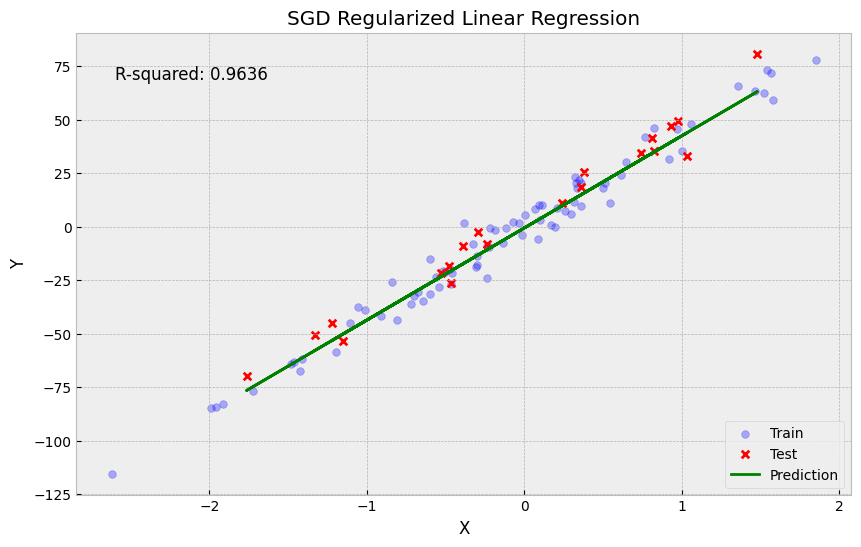

In [180]:

import matplotlib.pyplot as plt
# Assuming x_test, y_test, and y_pred_ridge_sgd are defined from the previous code
plt.figure(figsize=(10, 6))

# Original scatter plot
plt.scatter(X_train, y_train, color='b', marker='o', s=30, label='train', alpha=0.3)
plt.scatter(X_test, y_test, color='r', marker='x', s=30, label='test')
plt.plot(X_test, y_pred_ridge_sgd, color='g', label='prediction')


# Labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Train', 'Test', 'Prediction', f'R-squared: {result}'])
plt.title("SGD Regularized Linear Regression (Ridge)")
plt.text(0.05, 0.9, f'R-squared: {result:.4f}', transform=plt.gca().transAxes, fontsize=12)
plt.grid(True)
plt.autoscale()
plt.show()


In [181]:
lasso_sgd_model = SGDRegularizedLinearRegression(lr=0.01, n_iters=1000, regularization="lasso", alpha=0.5)
lasso_sgd_model.fit(X_train, y_train)
y_pred_lasso_sgd = lasso_sgd_model.predict(X_test)
lasso_sgd_model.show_accuracy(y_test, y_pred_lasso_sgd)


np.float64(0.9680554853194784)

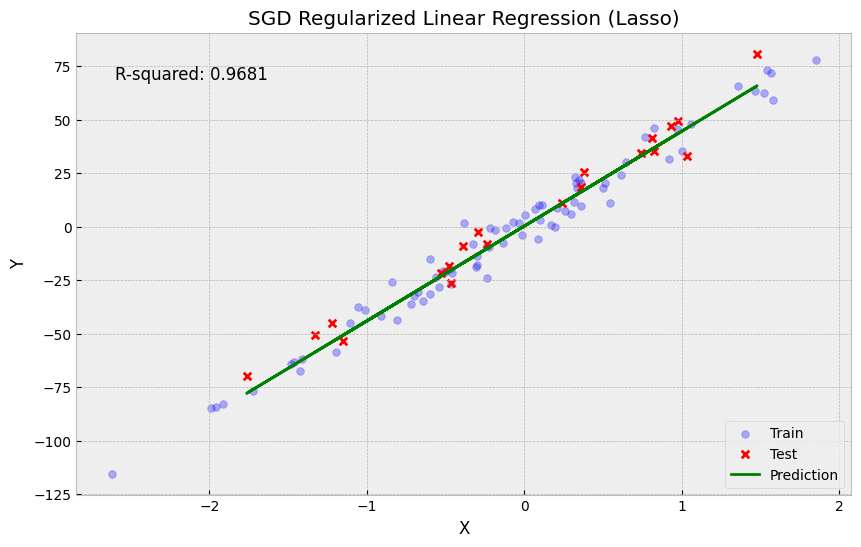

In [182]:

import matplotlib.pyplot as plt
# Assuming x_test, y_test, and y_pred_lasso_sgd are defined from the previous code
plt.figure(figsize=(10, 6))

# Original scatter plot
plt.scatter(X_train, y_train, color='b', marker='o', s=30, label='train', alpha=0.3)
plt.scatter(X_test, y_test, color='r', marker='x', s=30, label='test')
plt.plot(X_test, y_pred_lasso_sgd, color='g', label='prediction')

# Labels and legend
result = lasso_sgd_model.show_accuracy(y_test, y_pred_lasso_sgd)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Train', 'Test', 'Prediction', f'R-squared: {result}'])
plt.title("SGD Regularized Linear Regression (Lasso)")
plt.text(0.05, 0.9, f'R-squared: {result:.4f}', transform=plt.gca().transAxes, fontsize=12)
plt.grid(True)
plt.autoscale()
plt.show()


# **Comparison Table: Linear Regression Techniques**

| **Feature**                      | **Normal Linear Regression**                                         | **SGD + Ridge (L2)**                                                      | **SGD + Lasso (L1)**                                                      |
|----------------------------------|----------------------------------------------------------------------|--------------------------------------------------------------------------|--------------------------------------------------------------------------|
| **Objective Function**           | $ \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x_i) - y_i)^2 $               | $ \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x_i) - y_i)^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2 $ | $ \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x_i) - y_i)^2 + \frac{\lambda}{m} \sum_{j=1}^{n} |\theta_j| $ |
| **Weight Update Rule**           | Closed-form solution                                                 | $ \theta_j := \theta_j - \alpha (\frac{\partial J(\theta)}{\partial \theta_j} + \frac{\lambda}{m} \theta_j) $ | $ \theta_j := \theta_j - \alpha (\frac{\partial J(\theta)}{\partial \theta_j} + \frac{\lambda}{m} \text{sign}(\theta_j)) $ |
| **Regularization**               | None                                                                 | L2 Regularization (Penalizes, does not eliminate)                        | L1 Regularization (Encourages sparsity, can eliminate)                    |
| **Overfitting Control**          | Weak                                                                 | Moderate                                                                 | Strong                                                                   |
| **Feature Selection**            | No                                                                   | No                                                                       | Yes (Can drive coefficients to zero)                                      |
| **Performance on Large Datasets**| Poor                                                                 | Good                                                                     | Good                                                                     |


## **To Sum Up**

  The comparison of regression techniques under a noise level of 7 reveals significant performance differences in terms of $R^2$ scores:

  - **Normal Linear Regression** achieved an $R^2$ score of **0.70**, indicating moderate predictive performance but a noticeable sensitivity to noise. The absence of regularization makes it prone to overfitting or underfitting, depending on data characteristics.  
  - **SGD with Ridge (L2) Regularization** reached an $R^2$ score of **0.9636**, demonstrating a substantial improvement in performance. The L2 regularization effectively penalizes large coefficients, reducing variance and enhancing model generalization.  
  - **SGD with Lasso (L1) Regularization** obtained the highest $R^2$ score of **0.9681**, outperforming the other methods. L1 regularization promotes sparsity, leading to an efficient model that performs well even in noisy environments by eliminating irrelevant features.  

  In conclusion, **SGD with Lasso (L1)** is the most effective approach under high noise conditions, offering superior predictive accuracy and automatic feature selection. Meanwhile, **SGD with Ridge (L2)** provides a balanced trade-off between complexity and performance, while **Normal Linear Regression** struggles without regularization. These findings highlight the importance of regularization techniques in achieving robust and accurate models, particularly in noisy datasets.  


